# Python Einführung Audio+Interactive

In [2]:
import scipy.signal
import scipy.io.wavfile

import IPython.display as ipd

In [3]:
samplerate, data = scipy.io.wavfile.read('../data/audio/HumanVoice-Hello_16bit_44.1kHz_mono.wav')
ipd.Audio(data, rate=samplerate)

In [4]:
data.shape[0]/samplerate

0.6991609977324263

In [5]:
data.min()

-21293

In [6]:
data.dtype

dtype('int16')

In [7]:
# Normierung
data_norm = data/2**16

In [8]:
data_norm.dtype

dtype('float64')

In [9]:
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

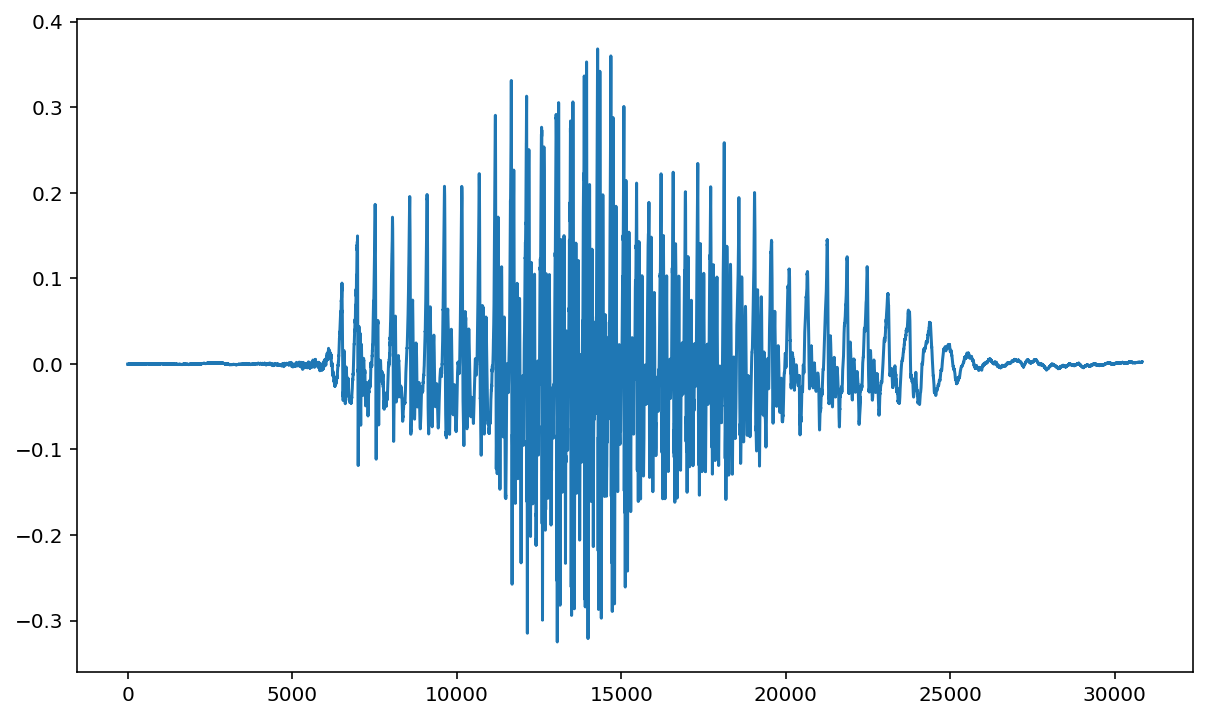

In [10]:
plt.figure(figsize=(10,6))
plt.plot(data_norm)

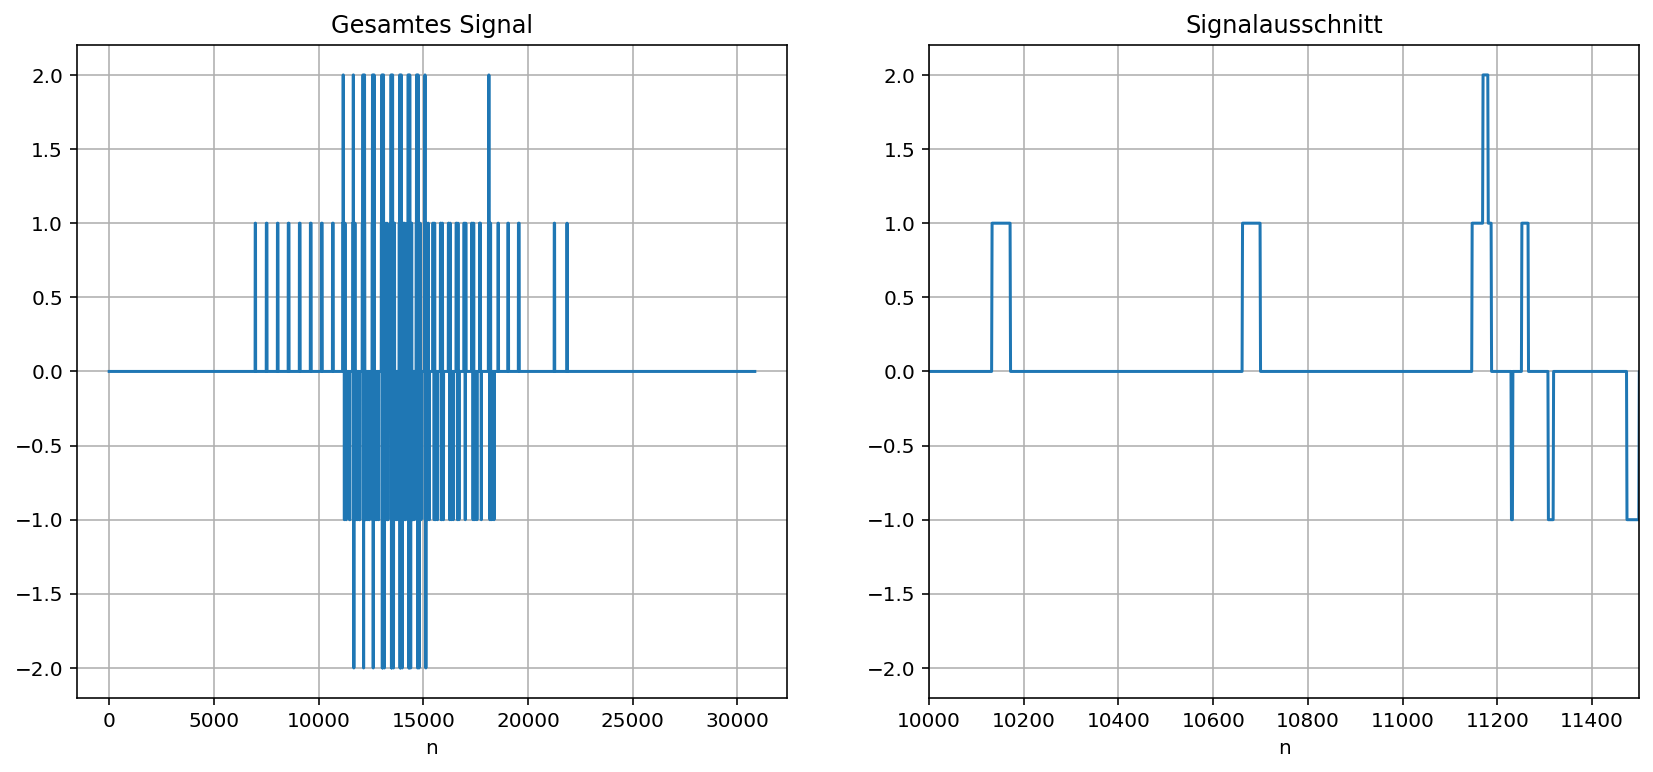

In [18]:
quantization_bits = 3
data_resample = data_norm * (2**quantization_bits)
data_resample = data_resample.astype(int)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(data_resample)
plt.title("Gesamtes Signal")
plt.grid(True)
plt.xlabel('n')

plt.subplot(1,2,2)
plt.plot(data_resample)
plt.xlim([10000,11500])
plt.title("Signalausschnitt")
plt.grid(True)
plt.xlabel('n')

ipd.Audio(data_resample, rate=samplerate)

In [16]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np

In [17]:
@interact
#def plot_sine(w=widgets.FloatSlider(min=0, max=1, value=0.3)):
def plot_sine(w=.3):
    x = np.linspace(0, 10*np.pi, 10**3)
    y = np.sin(2*np.pi*w*x) + np.cos(2*np.pi*w*x)
    plt.plot(x,y)

interactive(children=(FloatSlider(value=0.3, description='w', max=0.8999999999999999, min=-0.3), Output()), _d…